<a href="https://colab.research.google.com/github/JuanParias29/BigDataProcessing/blob/main/Arias_SQL_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

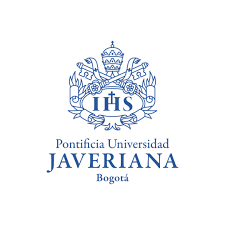

***Pontificia Universidad Javeriana***
# **Procesamiento de Alto Volumen de Datos**

### Taller: **SQL con PySpark**

Autor: Juan Pablo Arias Buitrago

Fecha:5/05/2025

**Objetivo**: Uso de SQL como motor de Consultas sobre DataFrame Spark.

Proporciona una abstracción de programación denominada DataFrames y también puede actuar como motor de consulta SQL distribuido. Permite ejecutar consultas Hadoop Hive no modificadas hasta 100 veces más rápido en implementaciones y datos existentes. También proporciona una potente integración con el resto del ecosistema Spark (por ejemplo, integrando el procesamiento de consultas SQL con MLib).

Spark SQL aporta soporte nativo para SQL a Spark y agiliza el proceso de consulta de datos almacenados tanto en RDD como en fuentes externas. Spark SQL difumina convenientemente las líneas entre RDDs y tablas relacionales. Spark SQL permite:

- Importar datos relacionales de archivos Parquet y tablas Hive
- Ejecutar consultas SQL sobre datos importados y RDDs existentes
- Escribir fácilmente RDDs en tablas Hive o archivos Parquet.

Spark SQL también incluye un optimizador basado en costes, almacenamiento en columnas y generación de código para agilizar las consultas. Al mismo tiempo, escala a miles de nodos y consultas de varias horas utilizando el motor Spark, que proporciona una tolerancia total a fallos a mitad de consulta, sin tener que preocuparse de utilizar un motor diferente para los datos históricos.

____________________________________________________

**1.- Crear sessión PySpark SQL**



```
from pyspark.sql.functions import col, when, avg
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("TallerSQL").getOrCreate()
```



In [1]:
# Importar librerias
from pyspark.sql.functions import col, when, avg
from pyspark.sql import SparkSession

# Crear sesion
spark = SparkSession.builder.appName("TallerSQL").getOrCreate()

**2.-Crear DataFrame Spark:**
- Al menos 15 registros: nombres y edades entre (10 y 70 años)**
- Mostrar dataframe

```
df00 = spark.createDataFrame(
        [
            ("nombre1", 22),
            ("nombre2", 31),
        ],
        ["Nombre", "Edad"],
)
```

In [2]:
df00 = spark.createDataFrame(
    [
        ("juan", 22),
        ("maria", 31),
        ("jose", 68),
        ("laura", 12),
        ("manuel", 53),
        ("ana", 11),
        ("pedro", 18),
        ("luis", 37),
        ("sofia", 19),
        ("carlos", 41),
        ("sandra", 33),
        ("elena", 15),
        ("roberto", 56),
        ("valeria", 30),
        ("fernando", 10)
    ],
    ["Nombre", "Edad"]
)

**3.- Agregue una nueva columna "Etapa":**
- Niño: menores de 12 años
- Adolescente: menores de 19 años
- Adulto: mayor que 19 años
- Mostrar dataframe



```
df1 = df.withColumn(
    "nombreColumna",
    when(col("nom") < 100, "vivo")
    .when(col("nom").between(100, 180), "novivo")
    .otherwise("nacer"),
)
```

In [3]:
df1 = df00.withColumn(
    "Etapa",
    when(col("Edad") >19, "Adulto")
    .when(col("Edad").between(12, 19), "Adolescente")
    .when(col("Edad") < 12, "Niño")
    .otherwise("sin etapa"),
)
df1.show()

+--------+----+-----------+
|  Nombre|Edad|      Etapa|
+--------+----+-----------+
|    juan|  22|     Adulto|
|   maria|  31|     Adulto|
|    jose|  68|     Adulto|
|   laura|  12|Adolescente|
|  manuel|  53|     Adulto|
|     ana|  11|       Niño|
|   pedro|  18|Adolescente|
|    luis|  37|     Adulto|
|   sofia|  19|Adolescente|
|  carlos|  41|     Adulto|
|  sandra|  33|     Adulto|
|   elena|  15|Adolescente|
| roberto|  56|     Adulto|
| valeria|  30|     Adulto|
|fernando|  10|       Niño|
+--------+----+-----------+



**4.- Filtre los datos que son solo 'Adolescentes y Adultos'**


```
dfA.where(col("columna").isin(["vivo", "novivo"])).show()
```

In [4]:
df1 = df1.where(col("Etapa").isin(["Adolescente", "Adulto"]))
df1.show()

+-------+----+-----------+
| Nombre|Edad|      Etapa|
+-------+----+-----------+
|   juan|  22|     Adulto|
|  maria|  31|     Adulto|
|   jose|  68|     Adulto|
|  laura|  12|Adolescente|
| manuel|  53|     Adulto|
|  pedro|  18|Adolescente|
|   luis|  37|     Adulto|
|  sofia|  19|Adolescente|
| carlos|  41|     Adulto|
| sandra|  33|     Adulto|
|  elena|  15|Adolescente|
|roberto|  56|     Adulto|
|valeria|  30|     Adulto|
+-------+----+-----------+



### Consultas al Dataframe por SQL

**5.- Consulte el promedio de la columna Edad**



```
spark.sql("select avg(Edad) from {dfB}", dfB=dfB).show()
```

In [5]:
spark.sql("select avg(Edad) from {df1}", df1=df1).show()

+-----------------+
|        avg(Edad)|
+-----------------+
|33.46153846153846|
+-----------------+



**6.- Consulte el promedio de la columna Edad por Etapa**



```
spark.sql("select colStage, avg(edad) from {dfH} group by colStage", dfH=dfH).show()
```



In [6]:
spark.sql("select Etapa, avg(Edad) from {df1} group by Etapa", df1=df1).show()

+-----------+-----------------+
|      Etapa|        avg(Edad)|
+-----------+-----------------+
|Adolescente|             16.0|
|     Adulto|41.22222222222222|
+-----------+-----------------+



**7.- Persistencia: crear un tabla para ser facilmente accesible por el API SQL**

- Crear la tabla
- Mostrar la tabla creada
- Insertar al menos 4 nuevos registros
- Mostrar nueva tabla

```
dfG.write.saveAsTable("nombreTabla")

spark.sql("select * from nombreTabla").show()

spark.sql("INSERT INTO nombreTabla VALUES ('nNombre', 14, 'vivo')")
```

In [10]:
df1.write.saveAsTable("TableSql")

spark.sql("select * from TableSql").show()

spark.sql("INSERT INTO TableSql VALUES ('Davin ci', 33, 'Adulto')")

spark.sql("select * from TableSql").show()

+-------+----+-----------+
| Nombre|Edad|      Etapa|
+-------+----+-----------+
|   luis|  37|     Adulto|
|  sofia|  19|Adolescente|
| carlos|  41|     Adulto|
| sandra|  33|     Adulto|
|  elena|  15|Adolescente|
|roberto|  56|     Adulto|
|valeria|  30|     Adulto|
|   juan|  22|     Adulto|
|  maria|  31|     Adulto|
|   jose|  68|     Adulto|
|  laura|  12|Adolescente|
| manuel|  53|     Adulto|
|  pedro|  18|Adolescente|
+-------+----+-----------+

+--------+----+-----------+
|  Nombre|Edad|      Etapa|
+--------+----+-----------+
|    luis|  37|     Adulto|
|   sofia|  19|Adolescente|
|  carlos|  41|     Adulto|
|  sandra|  33|     Adulto|
|   elena|  15|Adolescente|
| roberto|  56|     Adulto|
| valeria|  30|     Adulto|
|    juan|  22|     Adulto|
|   maria|  31|     Adulto|
|    jose|  68|     Adulto|
|   laura|  12|Adolescente|
|  manuel|  53|     Adulto|
|   pedro|  18|Adolescente|
|Davin ci|  33|     Adulto|
+--------+----+-----------+



**8.- Consulte en la tabla los adolescentes:**



```
spark.sql("select * from TablaNombre where NTapaS='vivos'").show()
```

In [11]:
spark.sql("select * from TableSql where Etapa='Adolescente'").show()

+------+----+-----------+
|Nombre|Edad|      Etapa|
+------+----+-----------+
| sofia|  19|Adolescente|
| elena|  15|Adolescente|
| laura|  12|Adolescente|
| pedro|  18|Adolescente|
+------+----+-----------+



## RDD Spark

**9.- Carge el Fichero [texto.txt](https://github.com/corredor-john/ExploratoryDataAnalisys/blob/f5444496cfbb1a2c2ec2c71592c321e557c0e5ae/Texto/SMSSpamCollection.txt) para ser leido por el contexto SPARK**

- Descargue el fichero
- Crear el contexto y cargue el fichero



```
fichero = spark.sparkContext.textFile("texto.txt")

counts = (
    fichero.flatMap(lambda linea: linea.split(" "))
    .map(lambda palabra: (palabra, 1))
    .reduceByKey(lambda a, b: a + b)
)
```



In [12]:
fichero = spark.sparkContext.textFile("texto.txt")

counts = (
    fichero.flatMap(lambda linea: linea.split(" "))
    .map(lambda palabra: (palabra, 1))
    .reduceByKey(lambda a, b: a + b)
)

## **10.- Conclusiones: redacte sus conclusiones por cada paso y conclusión final de Cierre**

### Resumen de lo hecho en el notebook

- **Paso 1:** Se importan las librerias necesarias de funciones sql para jugar con el dataset e iniciar sesión en spark para poder usar las funciones.
- **Paso 2:** Se crea el dataset de forma manual con la funcion CreateDataFrame que crea un objeto tipo Frame en spark.
- **Paso 3 y 4:** Utilizando el código proporcionado del docente se hacen filtros y consultas básicas al DataFrame
- **Paso 5 y 6:** Se utilizan funciones aritméticas  al conjunto de datos.
- **Paso 7 y 8:** Se crea una tabla sql usando la API que proporciona SPARK con el fin de mantener los datos y recuperarlos en cualquier momento, manteniendo la *persisntencia*
- **Paso 9:** Se sube un fichero de forma local para en un futuro trabajar con el.
---

### Conclusiones y Aprendizajes

1. Se concluyo que Spark nos permite crear datasets y usar objetos Dataframes para jugar con ellos, importante en Big Data.
2. EL uso de SQL nos permitio mantener la persistencia del conjunto de datos, vital al momento de hacer transformaciones y cambios.
3. Considero que el taller fue practico y útil para entender el funcionamiento de SparkSQL como montor de consultas, sin embargo con un contexto de negocio podría verse más reflejado su utilidad en la industria.